Fitting for 20081212_0854

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, fsolve

from matplotlib.pyplot import figure

import scipy
from scipy.signal import savgol_filter

from scipy.interpolate import interp1d
from numpy import diff

plt.rcParams['font.size'] = '15'

In [2]:
gamma = 5/3
R_sun = 6.957e+8   # in metres

Measurements 

In [3]:
time = np.array(['2008-12-12T09:37', '2008-12-12T10:07', '2008-12-12T10:37', '2008-12-12T11:07', '2008-12-12T11:37', '2008-12-12T12:07', '2008-12-12T12:37', '2008-12-12T13:07', '2008-12-12T13:37', '2008-12-12T14:07', '2008-12-12T14:37', '2008-12-12T15:07', '2008-12-12T15:37', '2008-12-12T16:07'], dtype='datetime64')

time_dummy = time #this will be used while de-interpolating

In [4]:
len_dummy = len(time)
len_dummy

14

In [5]:
Height = np.array([5.98, 6.38, 6.88, 7.68, 8.23, 9.25, 10.25, 11.45, 12.65, 13.45, 14.65, 15.75, 16.48, 17.38])
Ratio = np.array([0.23, 0.24, 0.25, 0.25, 0.25, 0.25, 0.25, 0.26, 0.26, 0.26, 0.27, 0.27, 0.27, 0.28])


L = np.zeros(len_dummy)
R = np.zeros(len_dummy)


for i in range (0, len_dummy):
    R[i] = Height[i]*R_sun/(1+(1/Ratio[i]))
    
#for i in range (0, len_dummy):
#    L[i] = (Height[i]*R_sun) - R[i] - R_sun 

for i in range (0, len_dummy):
    L[i] = Height[i]*R_sun/(1+Ratio[i])

print('R = ', R)
print('L = ', L)


R =  [7.77939659e+08 8.59077290e+08 9.57283200e+08 1.06859520e+09
 1.14512220e+09 1.28704500e+09 1.42618500e+09 1.64372929e+09
 1.81599786e+09 1.93084357e+09 2.16680421e+09 2.32949941e+09
 2.43746986e+09 2.64496444e+09]
L =  [3.38234634e+09 3.57948871e+09 3.82913280e+09 4.27438080e+09
 4.58048880e+09 5.14818000e+09 5.70474000e+09 6.32203571e+09
 6.98460714e+09 7.42632143e+09 8.02520079e+09 8.62777559e+09
 9.02766614e+09 9.44630156e+09]


In [6]:
v_c_ = savgol_filter(diff(L)/(30*60), 13, 1 )      #unit m/s  (assuming 30 minute interval in observations)
v_e_ = savgol_filter(diff(R)/(30*60), 13, 1 )

In [7]:
a_c_= savgol_filter(diff(v_c_)/(30*60), 11, 1 )       #unit m/s^2   (assuming 30 minute interval in observations)
a_e_ = savgol_filter(diff(v_e_)/(30*60), 11, 1 )

In [8]:
da_e_dt_ = savgol_filter(diff(a_e_)/(30*60), 11, 1 )

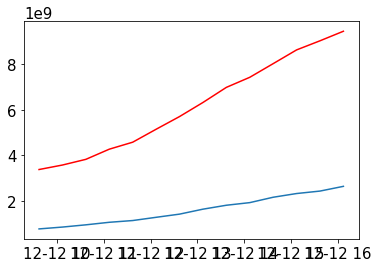

In [9]:
plt.plot(time, L, color = 'red')
plt.plot(time, R)

plt.show()

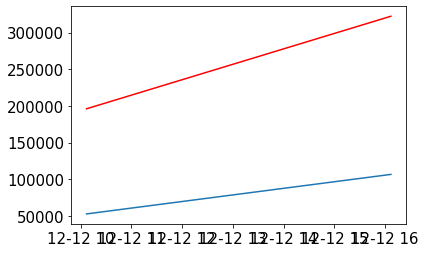

In [10]:
plt.plot(time[1:], v_c_,  color = 'red')
plt.plot(time[1:], v_e_)

plt.show()

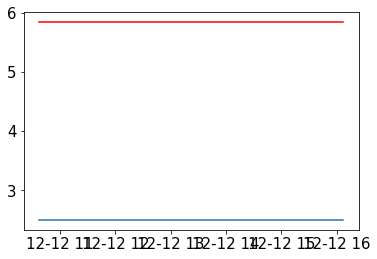

In [11]:
plt.plot(time[2:], a_c_,  color = 'red')
plt.plot(time[2:], a_e_)

plt.show()

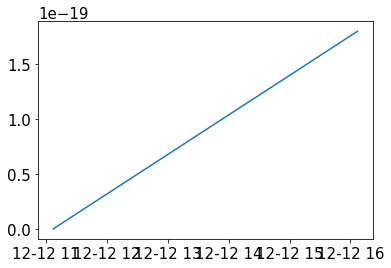

In [12]:
plt.plot(time[3:], da_e_dt_)

plt.show()

Trim variables

In [13]:
L_ = L[3:]
R_ = R[3:]
time = time[3:]
v_c_ = v_c_[2:]
v_e_ = v_e_[2:]
a_c_ = a_c_[1:]
a_e_ = a_e_[1:]
da_e_dt_ = da_e_dt_[0:]

In [14]:
len(da_e_dt_)

11

In [15]:
len_dummy = len(time)
len_dummy

11

#### Interpolation

In [16]:
time_fl = np.zeros(len_dummy)

for i in range (0, len_dummy):
    time_fl[i] = (time[i] - time[0])/(np.timedelta64(1, 'm'))*60
    
time_fl

array([    0.,  1800.,  3600.,  5400.,  7200.,  9000., 10800., 12600.,
       14400., 16200., 18000.])

L

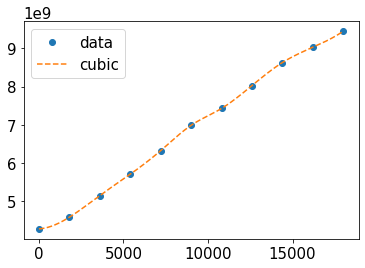

In [17]:
inpt_var = L_

f2 = interp1d(time_fl, inpt_var, kind='cubic')
time_fl_inpt = np.linspace(0, int(time_fl[-1]), num=int(time_fl[-1]), endpoint=True)

plt.plot(time_fl, inpt_var, 'o', time_fl_inpt, f2(time_fl_inpt), '--')
plt.legend(['data', 'cubic'], loc='best')
plt.show()

In [18]:
L = f2(time_fl_inpt)
L

array([4.27438080e+09, 4.27441117e+09, 4.27444173e+09, ...,
       9.44570543e+09, 9.44600344e+09, 9.44630156e+09])

R

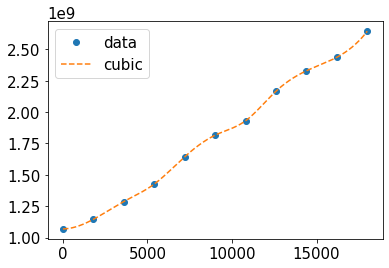

In [19]:
inpt_var = R_

f2 = interp1d(time_fl, inpt_var, kind='cubic')
time_fl_inpt = np.linspace(0, int(time_fl[-1]), num=int(time_fl[-1]), endpoint=True)

plt.plot(time_fl, inpt_var, 'o', time_fl_inpt, f2(time_fl_inpt), '--')
plt.legend(['data', 'cubic'], loc='best')
plt.show()

In [20]:
R = f2(time_fl_inpt)
R

array([1.06859520e+09, 1.06859671e+09, 1.06859828e+09, ...,
       2.64461674e+09, 2.64479055e+09, 2.64496444e+09])

v_c

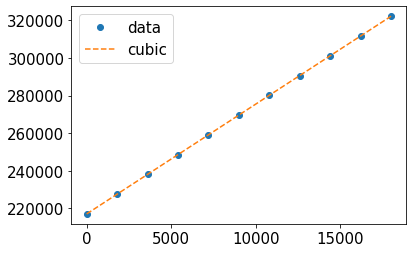

In [21]:
inpt_var = v_c_

f2 = interp1d(time_fl, inpt_var, kind='cubic')
time_fl_inpt = np.linspace(0, int(time_fl[-1]), num=int(time_fl[-1]), endpoint=True)

plt.plot(time_fl, inpt_var, 'o', time_fl_inpt, f2(time_fl_inpt), '--')
plt.legend(['data', 'cubic'], loc='best')
plt.show()

In [22]:
v_c = f2(time_fl_inpt)
v_c

array([217118.11678784, 217123.95395501, 217129.79112217, ...,
       322169.61426986, 322175.45143703, 322181.2886042 ])

v_e

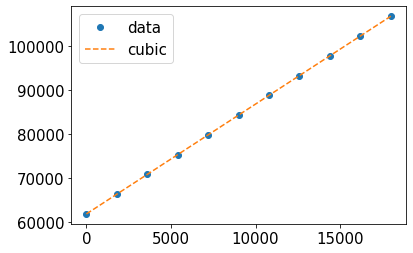

In [23]:
inpt_var = v_e_

f2 = interp1d(time_fl, inpt_var, kind='cubic')
time_fl_inpt = np.linspace(0, int(time_fl[-1]), num=int(time_fl[-1]), endpoint=True)

plt.plot(time_fl, inpt_var, 'o', time_fl_inpt, f2(time_fl_inpt), '--')
plt.legend(['data', 'cubic'], loc='best')
plt.show()

In [24]:
v_e = f2(time_fl_inpt)
v_e

array([ 61841.44365172,  61843.93628187,  61846.42891203, ...,
       106701.30855308, 106703.80118323, 106706.29381339])

In [25]:
len(time_fl)

11

a_e

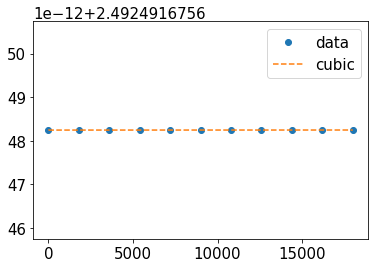

In [26]:
inpt_var = a_e_

f2 = interp1d(time_fl, inpt_var, kind='cubic')
time_fl_inpt = np.linspace(0, int(time_fl[-1]), num=int(time_fl[-1]), endpoint=True)

plt.plot(time_fl, inpt_var, 'o', time_fl_inpt, f2(time_fl_inpt), '--')
plt.legend(['data', 'cubic'], loc='best')
plt.show()

In [27]:
a_e = f2(time_fl_inpt)
a_e

array([2.49249168, 2.49249168, 2.49249168, ..., 2.49249168, 2.49249168,
       2.49249168])

da_e_dt

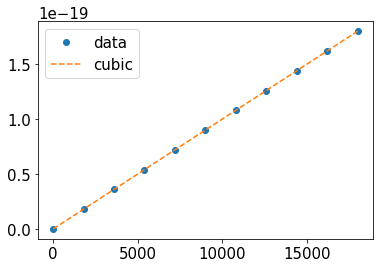

In [28]:
inpt_var = da_e_dt_

f2 = interp1d(time_fl, inpt_var, kind='cubic')
time_fl_inpt = np.linspace(0, int(time_fl[-1]), num=int(time_fl[-1]), endpoint=True)

plt.plot(time_fl, inpt_var, 'o', time_fl_inpt, f2(time_fl_inpt), '--')
plt.legend(['data', 'cubic'], loc='best')
plt.show()

In [29]:
da_e_dt = f2(time_fl_inpt)
da_e_dt

array([-8.65211113e-36,  9.96888626e-24,  1.99377725e-23, ...,
        1.79410046e-19,  1.79420015e-19,  1.79429984e-19])

## Final plot

In [30]:
time = time_fl_inpt

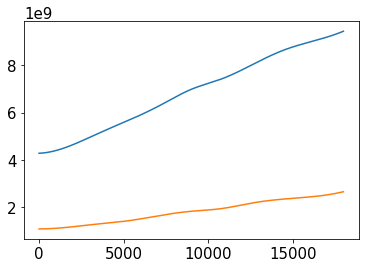

In [31]:
plt.plot(time, L)
plt.plot(time, R)

plt.show()

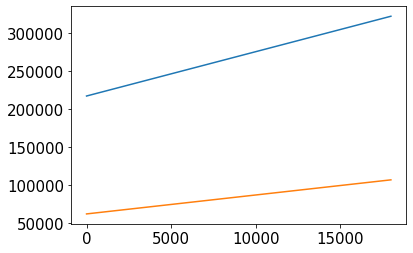

In [32]:
plt.plot(time, v_c)
plt.plot(time, v_e)

plt.show()

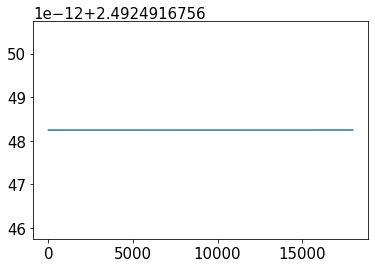

In [33]:
#plt.plot(time, a_c)
plt.plot(time, a_e)

plt.show()

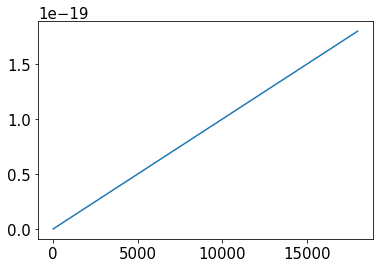

In [34]:
plt.plot(time, da_e_dt)

plt.show()

In [35]:
ga = np.array([gamma]*(len(da_e_dt)))
ga

array([1.66666667, 1.66666667, 1.66666667, ..., 1.66666667, 1.66666667,
       1.66666667])

### Fitting

Fitting every new data needs some modification of the powers to get a better fit (based on the coder/user please change the values as per convinience)

In [36]:
# Equation

# (R**(-1)) = (c_5 * a_e) - (c_1*c_5 * (R**(-3))) - (c_2*c_5 * L*(R**(-3))) - (c_3*c_5 * (L**(-1))*(R**(-1))) + (c_4 * ((da_e_dt*L*(R**(-2)))+(((2*ga)-1)*a_e*v_e*L*(R**(-3)))+((ga-1)*a_e*v_c*(R**(-2)))) ) + (c_1*c_4 * (((4-(2*ga))*v_e*L*(R**(-6)))+((1-ga)*v_c*(R**(-5)))) ) + (c_2*c_4 * (((4-(2*ga))*v_e*(L**2)*(R**(-6)))-(ga*v_c*L*(R**(-5)))) ) + (c_3*c_4 * (((2-(2*ga))*v_e*(R**(-4)))+((2-ga)*v_c*(L**(-1))*(R**(-3)))) )

In [37]:
y = R**(-1)
t5 = a_e 
t1_5 = R**(-3) 
t2_5 = L*(R**(-3))
t3_5 = (L**(-1))*(R**(-1))
t4 = (da_e_dt*L*(R**(-2)))+(((2*ga)-1)*a_e*v_e*L*(R**(-3)))+((ga-1)*a_e*v_c*(R**(-2)))
t1_4 = ((4-(2*ga))*v_e*L*(R**(-6)))+((1-ga)*v_c*(R**(-5)))
t2_4 = ((4-(2*ga))*v_e*(L**2)*(R**(-6)))-(ga*v_c*L*(R**(-5)))
t3_4 = ((2-(2*ga))*v_e*(R**(-4)))+((2-ga)*v_c*(L**(-1))*(R**(-3)))


In [39]:
y = y*1e+10
t5 = t5
t1_5 = t1_5*1e+28
t2_5 = t2_5*1e+18
t3_5 = t3_5*1e+19
t4 = t4*1e+13
t1_4 = t1_4*1e+41
t2_4 = t2_4*1e+31
t3_4 = t3_4*1e+32


In [40]:
y, t5, t1_5, t2_5, t3_5, t4, t1_4, t2_4, t3_4

(array([9.35808059, 9.35806737, 9.35805363, ..., 3.78126624, 3.78101775,
        3.78076917]),
 array([2.49249168, 2.49249168, 2.49249168, ..., 2.49249168, 2.49249168,
        2.49249168]),
 array([8.19521483, 8.19518009, 8.19514402, ..., 0.54064448, 0.5405379 ,
        0.54043129]),
 array([3.50294689, 3.50295693, 3.50296655, ..., 0.51067685, 0.51059228,
        0.5105077 ]),
 array([2.18934181, 2.18932316, 2.1893043 , ..., 0.40031592, 0.40027698,
        0.40023803]),
 array([15.75809457, 15.7587145 , 15.75933259, ...,  3.93445357,
         3.93391608,  3.9333784 ]),
 array([1.44721947, 1.44747437, 1.44772877, ..., 0.03037038, 0.03035527,
        0.03034016]),
 array([-6.04184725, -6.04191323, -6.04197787, ..., -0.20654984,
        -0.2064976 , -0.20644535]),
 array([-4.93602336, -4.93622094, -4.93641743, ..., -0.22937545,
        -0.22931874, -0.22926202]))

In [41]:
def func(X, c_1, c_2, c_3, c_4, c_5):
    t5, t1_5, t2_5, t3_5, t4, t1_4, t2_4, t3_4 = X
    return (c_5 * t5) - (c_1*c_5 *t1_5) - (c_2*c_5*t2_5) - (c_3*c_5*t3_5) + (c_4*t4) + (c_1*c_4*t1_4) + (c_2*c_4*t2_4) + (c_3*c_4*t3_4)

(c_1, c_2, c_3, c_4, c_5), COV = curve_fit(func, (t5, t1_5, t2_5, t3_5, t4, t1_4, t2_4, t3_4), y, bounds = ((0, -np.inf,-np.inf, -np.inf,-np.inf),(np.inf, np.inf,0,np.inf, np.inf)) )

In [42]:
(c_1, c_2, c_3, c_4, c_5), COV

((8.046315496634752e-30,
  0.9292344235010429,
  -0.99140587469607,
  0.5376106679994824,
  0.7235176418061945),
 array([[ 7.65404052e-04, -3.80606886e-04, -4.16280996e-04,
         -5.48164838e-06, -1.57505683e-05],
        [-3.80606886e-04,  1.98357559e-03, -2.35152540e-03,
         -3.39840447e-05, -2.89963671e-06],
        [-4.16280996e-04, -2.35152540e-03,  3.88284948e-03,
          5.76448032e-05,  2.05561252e-05],
        [-5.48164838e-06, -3.39840447e-05,  5.76448032e-05,
          1.45866996e-06, -6.55838774e-07],
        [-1.57505683e-05, -2.89963671e-06,  2.05561252e-05,
         -6.55838774e-07,  1.99982576e-06]]))

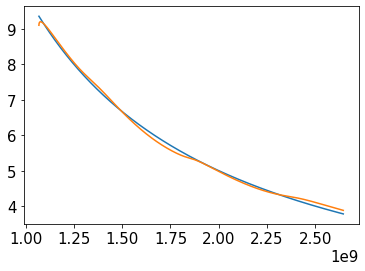

In [43]:
plt.plot(R, y)
plt.plot(R, func((t5, t1_5, t2_5, t3_5, t4, t1_4, t2_4, t3_4), c_1, c_2, c_3, c_4, c_5))


plt.show()

In [44]:
c_5 = c_5*1e-10

In [45]:
c_4 = c_4*1e+13*1e-10

In [46]:
c_3 = c_3*1e+19*1e-10

In [47]:
c_2 = c_2*1e+18*1e-10

In [48]:
c_1 = c_1*1e+28*1e-10

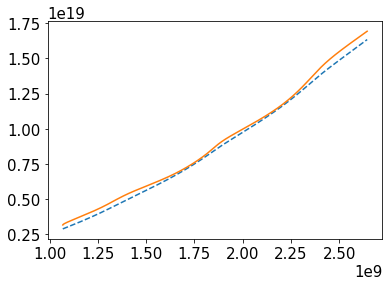

In [49]:
# Recheck using original function

plt.plot(R, ((L*(R**2))**(ga-1)), '--')
plt.plot(R, (((L**(ga-1))*(R**((2*ga)-1))) * ( (c_5*a_e) + (((-c_3)*c_5*(L**(-1)))*(R**(-1))) + (((c_4*L*da_e_dt)+((ga-1)*c_4*a_e*v_c))*(R**(-2))) + ((((2-ga)*c_3*c_4*v_c*(L**(-1)))+(((2*ga)-1)*c_4*a_e*v_e*L)-(c_2*c_5*L)-(c_1*c_5))*(R**(-3))) + (((2-(2*ga))*c_3*c_4*v_e)*(R**(-4))) + ((((1-ga)*c_4*c_1*v_c)-(ga*c_2*c_4*v_c*L))*(R**(-5))) + (((4-(2*ga))*v_e*c_4*((c_1*L)+(c_2*(L**2))))*(R**(-6))))))


In [50]:
# Recheck using original function

print(((L*(R**2))**(ga-1)))
print(((L**(ga-1))*(R**((2*ga)-1))) * ( (c_5*a_e) + (((-c_3)*c_5*(L**(-1)))*(R**(-1))) + (((c_4*L*da_e_dt)+((ga-1)*c_4*a_e*v_c))*(R**(-2))) + ((((2-ga)*c_3*c_4*v_c*(L**(-1)))+(((2*ga)-1)*c_4*a_e*v_e*L)-(c_2*c_5*L)-(c_1*c_5))*(R**(-3))) + (((2-(2*ga))*c_3*c_4*v_e)*(R**(-4))) + ((((1-ga)*c_4*c_1*v_c)-(ga*c_2*c_4*v_c*L))*(R**(-5))) + (((4-(2*ga))*v_e*c_4*((c_1*L)+(c_2*(L**2))))*(R**(-6)))))


[2.87739686e+18 2.87741591e+18 2.87743526e+18 ... 1.63420520e+19
 1.63438278e+19 1.63456045e+19]
[3.15935376e+18 3.15948162e+18 3.15960967e+18 ... 1.69354401e+19
 1.69371444e+19 1.69388496e+19]


### Error in Fit

In [51]:
c_1, c_2, c_3, c_4, c_5 = c_1, c_2, c_3, c_4, c_5 

In [52]:
RHS_final =((L**(ga-1))*(R**((2*ga)-1))) * ( (c_5*a_e) + (((-c_3)*c_5*(L**(-1)))*(R**(-1))) + (((c_4*L*da_e_dt)+((ga-1)*c_4*a_e*v_c))*(R**(-2))) + ((((2-ga)*c_3*c_4*v_c*(L**(-1)))+(((2*ga)-1)*c_4*a_e*v_e*L)-(c_2*c_5*L)-(c_1*c_5))*(R**(-3))) + (((2-(2*ga))*c_3*c_4*v_e)*(R**(-4))) + ((((1-ga)*c_4*c_1*v_c)-(ga*c_2*c_4*v_c*L))*(R**(-5))) + (((4-(2*ga))*v_e*c_4*((c_1*L)+(c_2*(L**2))))*(R**(-6))))
RHS_final

array([3.15935376e+18, 3.15948162e+18, 3.15960967e+18, ...,
       1.69354401e+19, 1.69371444e+19, 1.69388496e+19])

In [53]:
LHS_final = (L*(R**2))**(ga-1)
LHS_final

array([2.87739686e+18, 2.87741591e+18, 2.87743526e+18, ...,
       1.63420520e+19, 1.63438278e+19, 1.63456045e+19])

In [54]:
error_fit = abs((LHS_final-RHS_final)/LHS_final)
error_fit

array([0.09799027, 0.09802744, 0.09806456, ..., 0.0363105 , 0.03630218,
       0.03629386])

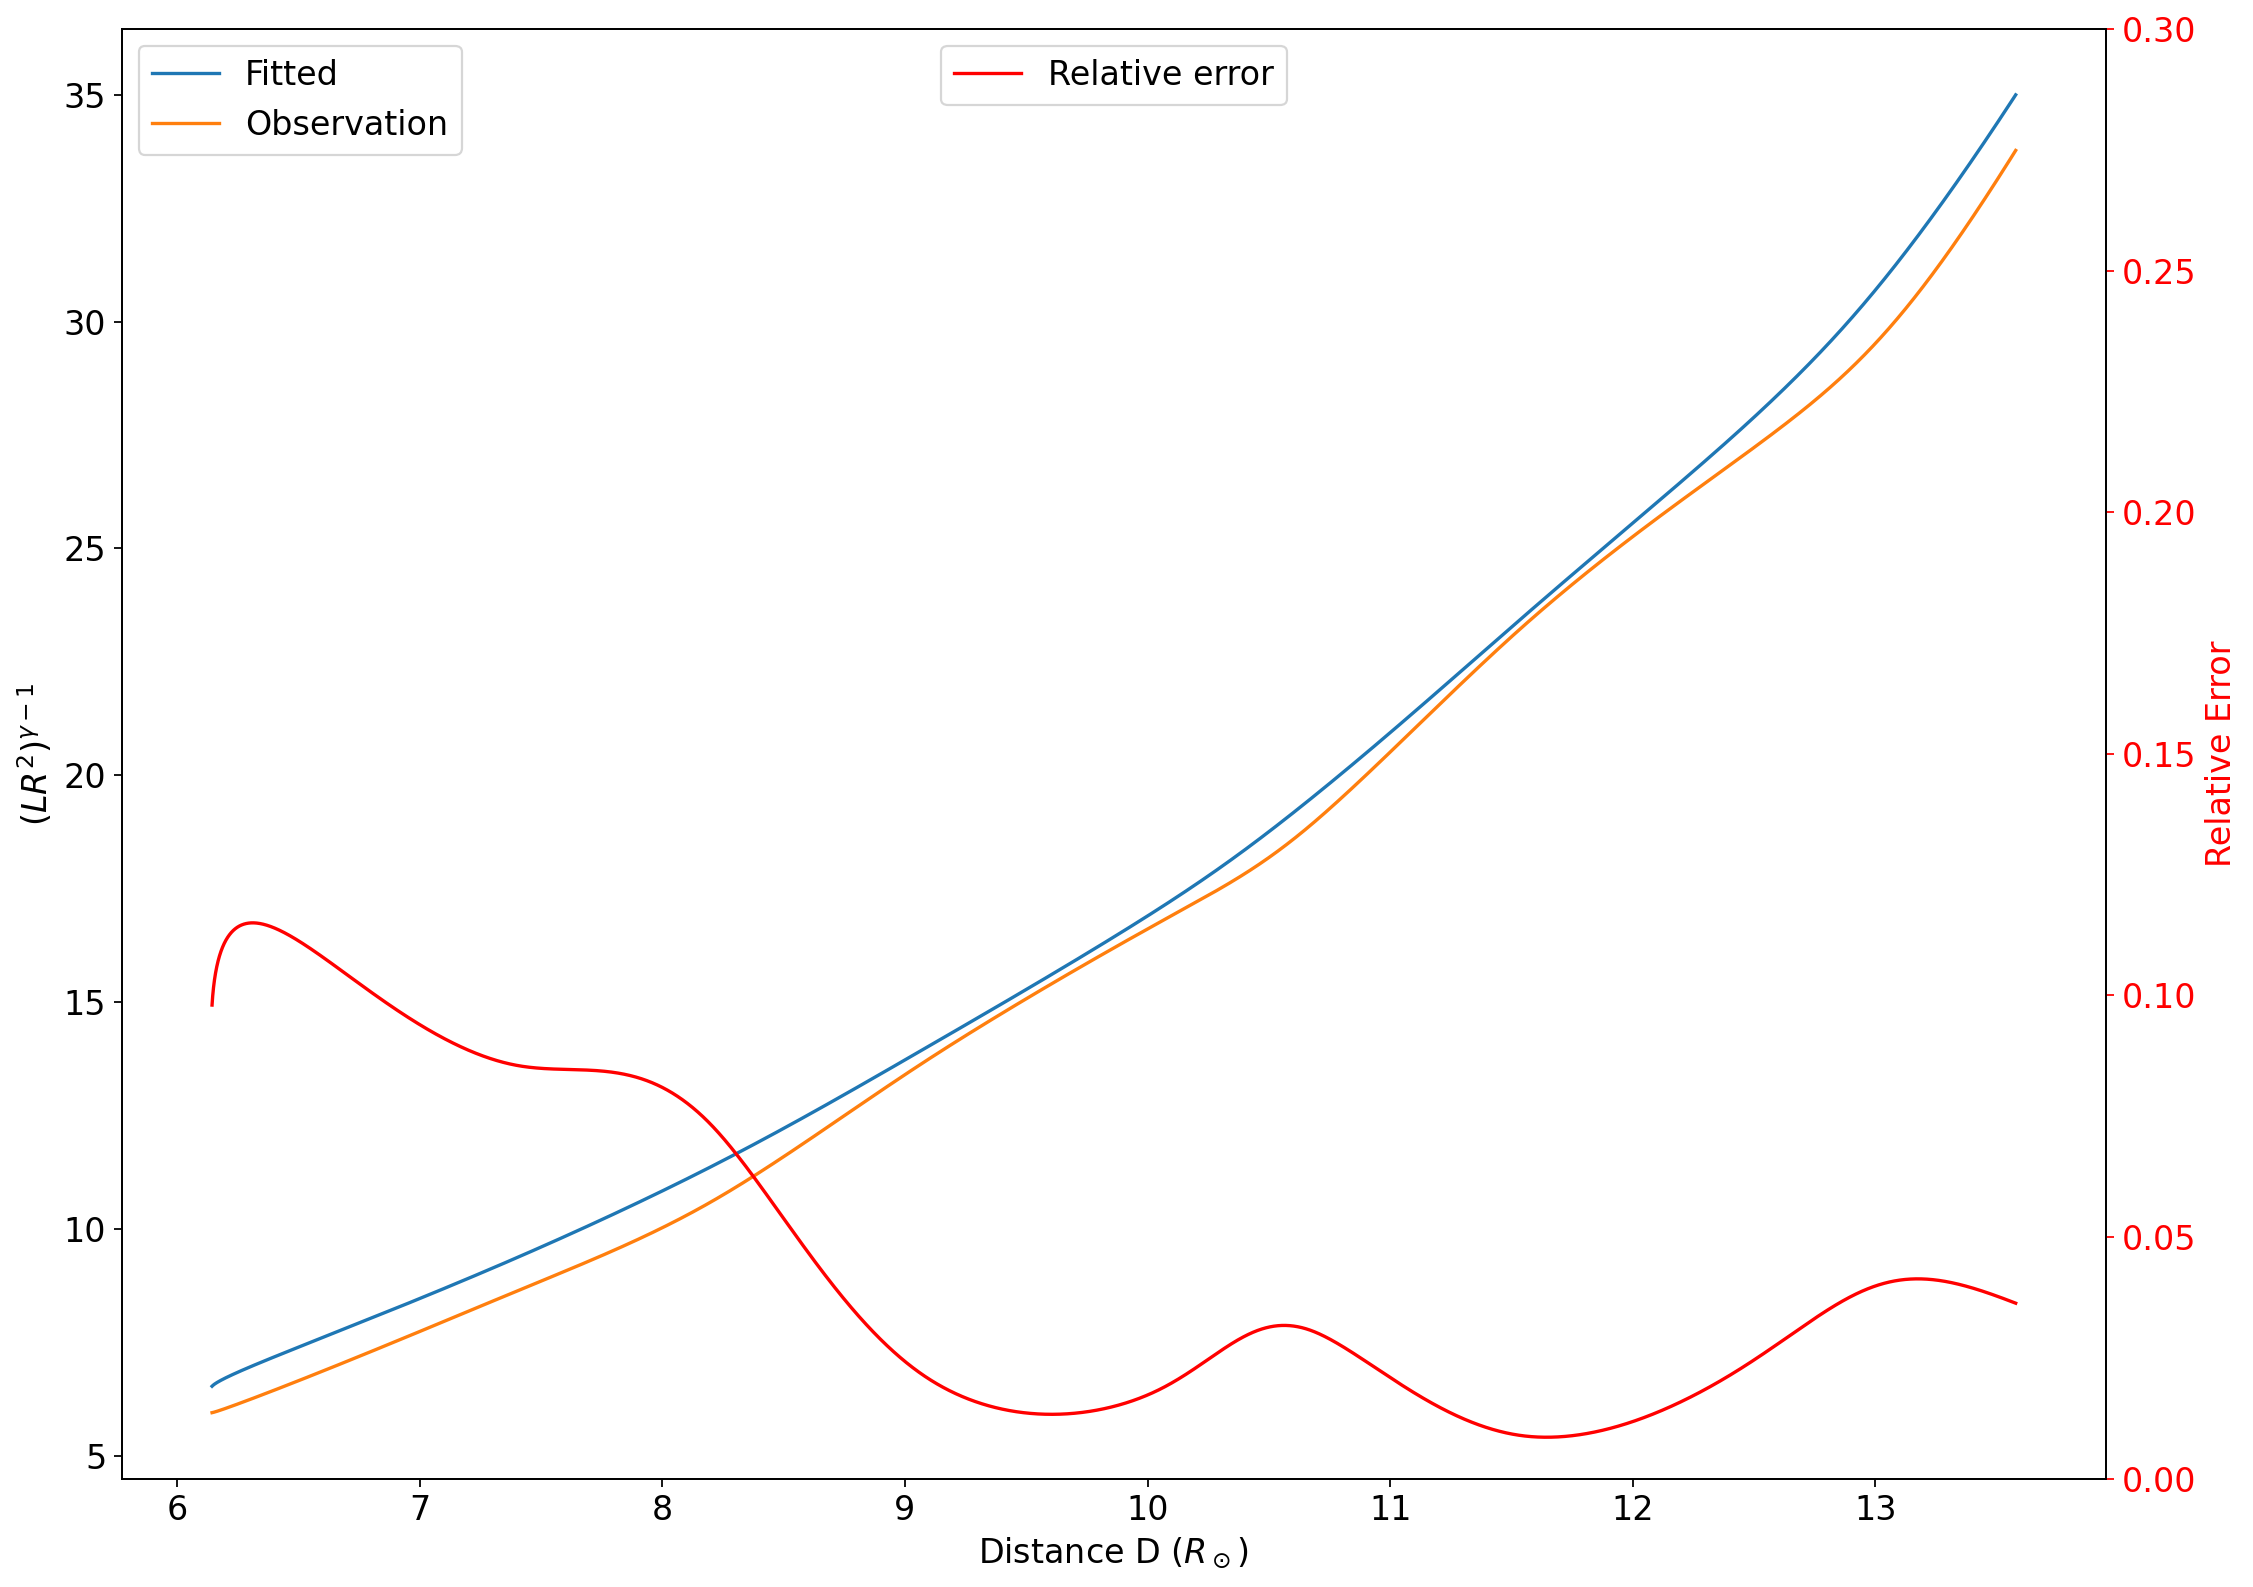

In [55]:
figure(figsize=(16,12), dpi=160)

plt.plot(L/R_sun, RHS_final/(R_sun**((3*ga)-3)), label = 'Fitted')          # units of R_sun
plt.plot(L/R_sun, LHS_final/(R_sun**((3*ga)-3)), label = 'Observation')

plt.legend(loc = 'best')

plt.ylabel('$(LR^2)^{\gamma-1}$')
plt.xlabel('Distance D ($R_\odot$)')


ax2=plt.twinx()
ax2.plot(L/R_sun, error_fit, label = 'Relative error', color ='red')
plt.ylim(0,0.3)

ax2.set_ylabel('Relative Error', color= 'red') 
ax2.tick_params(axis='y', color='red', labelcolor='red')


plt.legend(loc = 'upper center')

plt.show()

The fitting constants

In [56]:
(c_1, c_2, c_3, c_4, c_5) 

(8.046315496634753e-12,
 92923442.3501043,
 -991405874.69607,
 537.6106679994824,
 7.235176418061945e-11)